Los datos atípicos, son valores que se alejan del comportamiento normal de los datos que se encuentran en el conjunto de datos. Existen dos tipos de datos atípicos:
* Puntos debalanceo
* Puntos de influencia

Las razones porque los que pueden generacer datos atipicos son errores de medida, datos  generados por comportamientos irregulares.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

C:\Users\ydmar\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\ydmar\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\ydmar\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


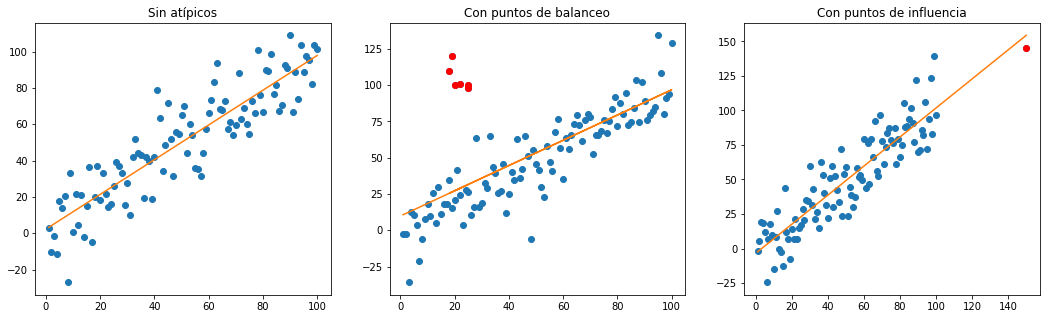

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
df = pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })
df = df.append({'x':20, 'y':100}, ignore_index=True) 
df = df.append({'x':19, 'y':120}, ignore_index=True) 
df = df.append({'x':18, 'y':110}, ignore_index=True) 
df = df.append({'x':22, 'y':101}, ignore_index=True) 
df = df.append({'x':25, 'y':98}, ignore_index=True) 
df = df.append({'x':25, 'y':100}, ignore_index=True) 


regr = linear_model.LinearRegression()
regr.fit(np.array(df.x).reshape((-1, 1)), np.array(df.y))
y_ajus = regr.predict(np.array(df.x).reshape(-1, 1))


axs[1].plot( 'x', 'y', data=df, linestyle='none', marker='o')
axs[1].plot(20, 100, marker="o", color="red")
axs[1].plot(19, 120, marker="o", color="red")
axs[1].plot(18, 110, marker="o", color="red")
axs[1].plot(22, 101, marker="o", color="red")
axs[1].plot(25, 98, marker="o", color="red")
axs[1].plot(25, 100, marker="o", color="red")
axs[1].plot(df.x, y_ajus)
axs[1].set_title('Con puntos de balanceo')

df = pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })
regr = linear_model.LinearRegression()
regr.fit(np.array(df.x).reshape((-1, 1)), np.array(df.y))
y_ajus = regr.predict(np.array(df.x).reshape(-1, 1))

axs[0].plot( 'x', 'y', data=df, linestyle='none', marker='o')
axs[0].plot(df.x, y_ajus)
axs[0].set_title('Sin atípicos')

df = pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })
df = df.append({'x':150, 'y':145}, ignore_index=True) 
regr = linear_model.LinearRegression()
regr.fit(np.array(df.x).reshape((-1, 1)), np.array(df.y))
y_ajus = regr.predict(np.array(df.x).reshape(-1, 1))

axs[2].plot( 'x', 'y', data=df, linestyle='none', marker='o')
axs[2].plot(150, 145, marker="o", color="red")
axs[2].plot(df.x, y_ajus)
axs[2].set_title('Con puntos de influencia')



plt.show()

# Matriz H

Leer articulo *The hat matrix in regression and ANOVA*. La matriz  $H=X(X'X)^{-1}X'$ es bastante importante en la identificación de valores atípicos ya que determina la varianza y covarianza de los vectores estimados $\hat{Y}$, ademas determina lo valores $e$ ya que $V(\hat{Y})= \sigma ^2H$ y $V(e)=(I-H)\sigma^2$. Los elementos de $h_{ij}$ de la matriz $H$ se pueden interpretar como *la cantidad de influencia empleada por $Y_i$ sobre $\hat{Y}$*.

$$tr(H)=p$$


$$\frac{\sum_{i=1}^n h_{ij}}{n}=\frac{p}{n}$$


si $h_{ij}$ es grande indica que  $x_{ij}$ es un dato atípico.

$$h_{ij}>\frac{2p}{n}$$

$n$ es el número de datos, $p$ es el número de parametros.

# Distancia de Cook

Este método identifica puntos potencialmente influyentes. 

$$D_i = \frac{(\hat{Y}-\hat{Y}_{(i)})(\hat{Y}-\hat{Y}_{(i)})}{ps^2}$$

* $\hat{Y}=Xb$ vectore de valores predichos
* $\hat{Y}_{(i)}=Xb_{(i)}$ vector de valores predichos cuando el $i_esimo$ punto es eliminado.
* $s^2 $ Es el estimador de la varianza $V(Y_i)= \sigma^2$ 

# DFFITS 

$$DFFITS_i = \frac{\hat{Y}_{i} - \hat{Y}_{(i)}}{\sqrt{s^2_{(i)}h_{ii}}}$$

El $DFFITS$ mide el número de desviaciones estándar en los que cambias $\hat{Y_{i}}$ si la $i-esima$ observación es eliminada. Es un estadístico relacionado con la distacia de cook.

Un dato se considera atípico  si $|DFFITS_i|>2\sqrt{\frac{p}{n}}$

# DFBETAS

El $DFBETA$ sugiere una medida que cambia cuando el coeficiente de regresión estimado $b_i$ cambia en unidades de desviación estandar si la $i-esima$ observación se elimina.

$$DFBETAS_{i,j}=\frac{b_j-b_{j(i)}}{\sqrt{s_{(i)}^2 C_{ij}}}$$

Un valor grande de $DFBETAS_{i,j}$ indica  que la $i-eisma$ observación tiene una considerable influencia sobre el $j-esimo$ coeficiente  de regresión  $b_j$.

La $i-esima$ observación  es atípica si  $|DFBETAS_{i,j}| > \frac{2}{\sqrt{n}}$

# COVRATIO

La estadística $COVRATIO$ utiliza la varianza generalizada del vector de parámetros estimados $b$.

$$COVRATIO_i=\frac{|s_{(i)}^2 (X_{(i)}^{'}X_{(i)})^{-1}|}{|s^2(X^{'}X)|^{-1}}  \  i = 1, 2,..., n$$

* Si $COVRATIO_i> 1$, entonces  $i-ésima$ observación mejora la precisión de la estimación, mientras que si  $COVRATIO_i< 1$ entonces  $i-ésima$ observación disminuye la precisión de la estimación.


* Si $COVRATIO_i> 1 + 3\frac{p}{n} $ o si  $COVRATIO_i< 1 - 3\frac{p}{n} $ la $i-ésima$ observación debe ser considerada atípica.